<a href="https://colab.research.google.com/github/sujith1197/summer-internship-ML-/blob/main/Code_for_Linear_Regression_and_Logistic_Regression_with_Toy_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION
Mean Squared Error: 104.20
Coefficient: 44.24
Intercept: 5.10


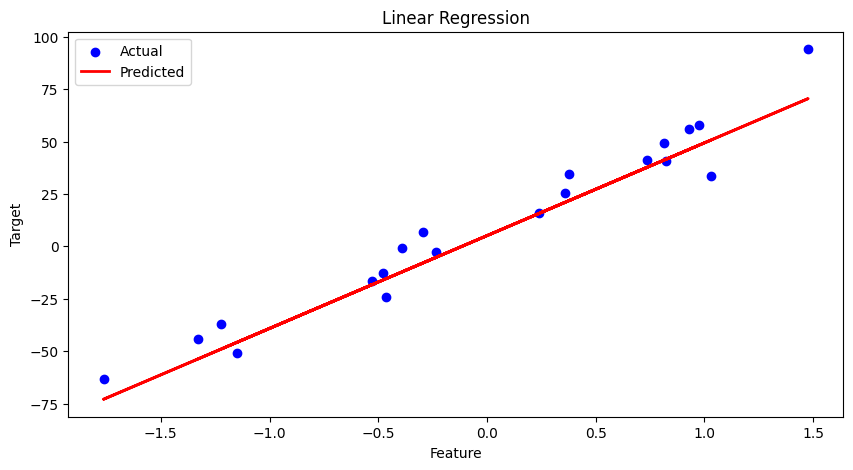


LOGISTIC REGRESSION
Accuracy: 1.00
Coefficients: [[-1.63568053  2.95772932]]
Intercept: [1.88757463]


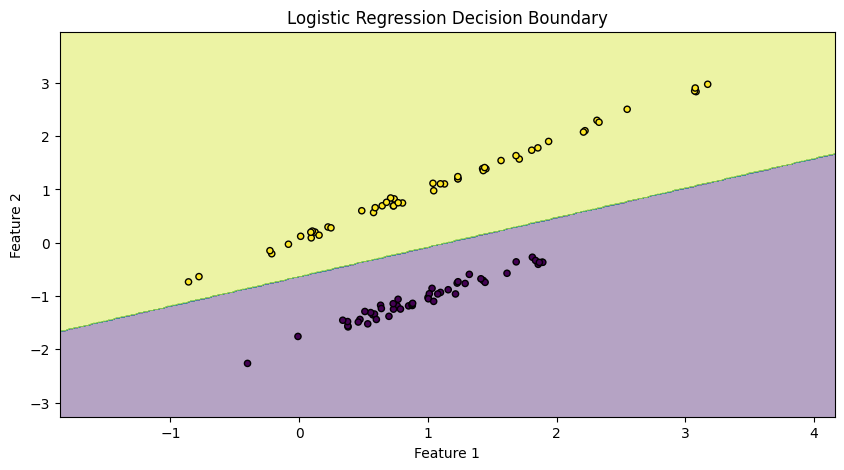


Confusion Matrix:
[[13  0]
 [ 0  7]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix


np.random.seed(42)

## 1. Linear Regression with Toy Dataset
print("="*50)
print("LINEAR REGRESSION")
print("="*50)


X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, bias=5)


X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)


y_reg_pred = lin_reg.predict(X_reg_test)


mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Coefficient: {lin_reg.coef_[0]:.2f}")
print(f"Intercept: {lin_reg.intercept_:.2f}")


plt.figure(figsize=(10, 5))
plt.scatter(X_reg_test, y_reg_test, color='blue', label='Actual')
plt.plot(X_reg_test, y_reg_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

## 2. Logistic Regression with Toy Dataset
print("\n" + "="*50)
print("LOGISTIC REGRESSION")
print("="*50)


X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                 n_informative=2, n_classes=2,
                                 n_clusters_per_class=1, random_state=42)


X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42)


log_reg = LogisticRegression()
log_reg.fit(X_clf_train, y_clf_train)


y_clf_pred = log_reg.predict(X_clf_test)
y_clf_pred_proba = log_reg.predict_proba(X_clf_test)[:, 1]

accuracy = accuracy_score(y_clf_test, y_clf_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Coefficients: {log_reg.coef_}")
print(f"Intercept: {log_reg.intercept_}")


plt.figure(figsize=(10, 5))
h = .02


x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=20, edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


cm = confusion_matrix(y_clf_test, y_clf_pred)
print("\nConfusion Matrix:")
print(cm)